In [1]:
import numpy as np
import pandas as pd
import csv
from konlpy.tag import Okt
from collections import Counter
import re

In [2]:
main_df = pd.read_csv('main_df (2).csv',encoding='utf8')

In [4]:
main_df.head()

NameError: name 'main_df' is not defined

# 한글 문서 추출(only_ko)

In [3]:
only_ko =  main_df[main_df['main_language']=='ko']
only_ko.head()

NameError: name 'main_df' is not defined

# 본문의 한글 데이터 전처리([^ㄱ-ㅎㅏ-ㅣ가-힣] 정규식 사용)

In [5]:
only_ko_content = list(re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',w).strip() for w in only_ko['text_without_tag'])

# 본문의 한글 데이터(re_content 칼럼 생성)

In [2]:
only_ko['re_content'] = only_ko_content
only_ko.head()

NameError: name 'only_ko_content' is not defined

# 본문의 명사 추출(Okt 이용)

In [1]:
vocab_list = [] # Okt 함수를 이용하여 명사추출한 데이터 리스트 
count = 0
okt = Okt()

for content in only_ko['re_content']:
    count += 1
    vocab = ''
    if content is np.nan: continue                      # nan값 건너뜀
    else:
        for w in okt.nouns(content):
            if len(w) == 1 and w != '돈' : continue    # 돈이 아닌 한글자짜리 단어 데이터 건너뜀
            vocab += w + ' '                        
    if count % 10000 == 0 : print(count)
    vocab_list.append(vocab)
print(vocab_list)

NameError: name 'Okt' is not defined

# 본문의 명사 리스트 (re_content_word 칼럼 생성)

In [5]:
only_ko['re_content_word'] = vocab_list 
only_ko

NameError: name 'only_ko' is not defined

In [61]:
only_ko.to_csv('ko_re_content_word.csv',mode='w')

In [62]:
only_ko = pd.read_csv("ko_re_content_word.csv")

# ★Word-Counting★

# 그룹별 본문 명사 리스트 합성

In [6]:
ko_data_A = [j for i in only_ko[only_ko['Group'] == 'A']['re_content_word'] for j in str(i).split()]
ko_data_B = [j for i in only_ko[only_ko['Group'] == 'B']['re_content_word'] for j in str(i).split()]
ko_data_C = [j for i in only_ko[only_ko['Group'] == 'C']['re_content_word'] for j in str(i).split()]
ko_data_D = [j for i in only_ko[only_ko['Group'] == 'D']['re_content_word'] for j in str(i).split()]

print(ko_data_A)
print()
print(ko_data_B)
print()
print(ko_data_C)
print()
print(ko_data_D)
print()

NameError: name 'only_ko' is not defined

# 그룹별 오름차순 Word-Counting

In [7]:
vocab_counting_A = dict(Counter(ko_data_A).most_common())
vocab_counting_B = dict(Counter(ko_data_B).most_common())  
vocab_counting_C = dict(Counter(ko_data_C).most_common()) 
vocab_counting_D = dict(Counter(ko_data_D).most_common())  

print(vocab_counting_A)
print()

print(vocab_counting_B)
print()

print(vocab_counting_C)
print()

print(vocab_counting_D)
print()

NameError: name 'Counter' is not defined

# ★WordCloud★

In [66]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib 
from matplotlib import rc
rc('font', family='NanumBarunGothic')

In [68]:
wordcloud_A = WordCloud(
    font_path = 'C:/Windows/Fonts/gulim.ttc',    # 한글 궁서체
    background_color='black',                    # 배경 색깔
    colormap = 'Accent_r',                       # 폰트 색깔
    width = 800,
    height = 800
)
wordcloud_B = WordCloud(
    font_path = 'C:/Windows/Fonts/gulim.ttc',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='black',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)
wordcloud_C = WordCloud(
    font_path = 'C:/Windows/Fonts/gulim.ttc',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='black',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)
wordcloud_D = WordCloud(
    font_path = 'C:/Windows/Fonts/gulim.ttc',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

In [69]:
wordcloud_words_A = wordcloud_A.generate_from_frequencies(vocab_counting_A)
wordcloud_words_B = wordcloud_B.generate_from_frequencies(vocab_counting_B)
wordcloud_words_C = wordcloud_C.generate_from_frequencies(vocab_counting_C)
wordcloud_words_D = wordcloud_D.generate_from_frequencies(vocab_counting_D) 

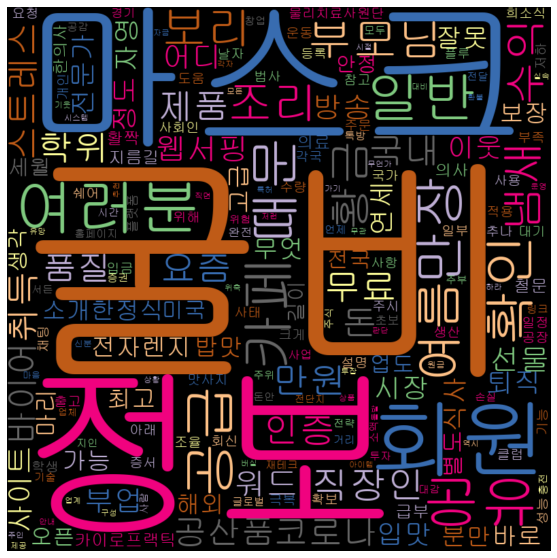

In [70]:
array = wordcloud_words_A.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('ko_groupA_worldcloud.png')

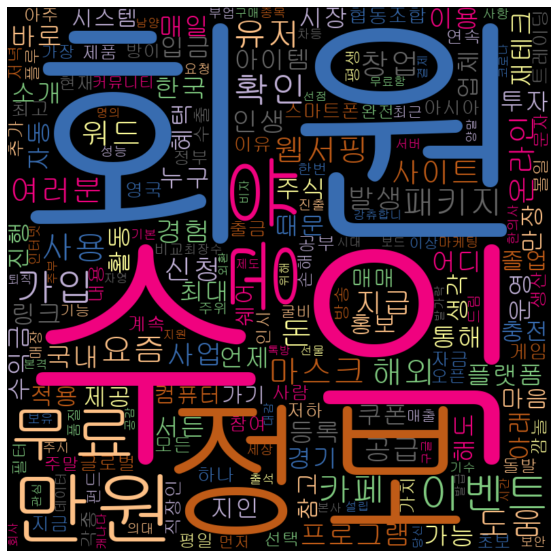

In [71]:
array = wordcloud_words_B.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('ko_groupB_worldcloud.png')

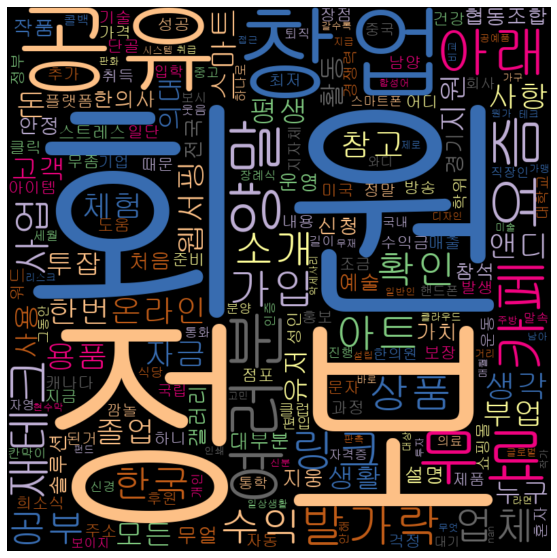

In [72]:
array = wordcloud_words_C.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('ko_groupC_worldcloud.png')

In [8]:
array = wordcloud_words_D.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('ko_groupD_worldcloud.png')

NameError: name 'wordcloud_words_D' is not defined

# Word-Cloud 분석

In [10]:
count = -1
error_list = []
only_ko_A =only_ko[only_ko['Group']=='B']
only_ko_A.index = range(len(only_ko_A))

# only_ko_A
for i in only_ko_A['re_content']:
    count += 1
#     print(str(i))
    if '패키지' in str(i):
        print(count)
        print(only_ko_A['file_name'][count])

NameError: name 'only_ko' is not defined

In [9]:
count = -1
error_list = []
only_ko_A =only_ko[only_ko['Group']=='B']
only_ko_A.index = range(len(only_ko_A))

for i in only_ko_A['text_without_tag']:
    count += 1
#     print(str(i))
    if '패키지' in str(i):
        print(count)
        print(only_ko_A['file_name'][count])
#         print(count)
#         print(i)
#         error_list.append(count)

NameError: name 'only_ko' is not defined